## Group Contributions Statement

All three of us wrote the data acquisition and preparation. Peiye Qi led Figure 1,2, Table,and the random forest model. Keying Zhang led Figure 3,4 and the kth Neighbors model. Warrick He led Figure 5,6, and the Ridge Classifier model. Peiye write the explanation of all figures, Keying wrote the explanation of the first two models, and Warrick wrote the explanation of the third model and the conclusion. We all checked each other’s work and made revisions to code and writing.



## Data import and cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [3]:
np.random.seed(12345)

train, test = train_test_split(penguins, test_size = 0.2)

In [4]:
def clean_penguins(data_df):
    df = data_df.copy().dropna(subset = ["Sex"])
    df = df[df['Sex']!='.']
    df["Species"]=df["Species"].str.split().str.get(0)
    return df

Train = clean_penguins(train)
Test = clean_penguins(test)
Train.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
154,PAL0708,3,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N62A1,Yes,11/26/07,51.3,19.2,193.0,3650.0,MALE,9.29078,-24.75570,NaN
99,PAL0809,100,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N50A2,Yes,11/10/08,43.2,18.5,192.0,4100.0,MALE,8.97025,-26.03679,NaN
254,PAL0809,35,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N2A1,Yes,11/13/08,49.1,14.8,220.0,5150.0,FEMALE,7.89744,-26.63405,NaN


We take the above fearures and test the accuracy of prediction for each combination in the next section.

## Exploratory Analysis

In [5]:
#summary table
def penguin_summary_table(group_cols, value_cols, input_df):
    return input_df.groupby(group_cols)[value_cols].mean().round(2)

group_col = ["Species", "Island", "Sex"]
value_col = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", 
             "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

penguins = clean_penguins(penguins)
penguin_summary_table(group_col, value_col, penguins)

Culmen Length (mm)  Culmen Depth (mm)  \
Species   Island    Sex                                             
Adelie    Biscoe    FEMALE               37.36              17.70   
                    MALE                 40.59              19.04   
          Dream     FEMALE               36.91              17.62   
                    MALE                 40.07              18.84   
          Torgersen FEMALE               37.55              17.55   
                    MALE                 40.59              19.39   
Chinstrap Dream     FEMALE               46.57              17.59   
                    MALE                 51.09              19.25   
Gentoo    Biscoe    FEMALE               45.56              14.24   
                    MALE                 49.47              15.72   

                            Flipper Length (mm)  Body Mass (g)  \
Species   Island    Sex                                          
Adelie    Biscoe    FEMALE               187.18        3369.32   
                    MALE                 190.41        4050.00   
          Dream     FEMALE               187.85        3344.44   
                    MALE                 191.93        4045.54   
          Torgersen FEMALE               188.29        3395.83   
                    MALE                 194.91        4034.78   
Chinstrap Dream     FEMALE               191.74        3527.21   
                    MALE                 199.91        3938.97   
Gentoo    Biscoe    FEMALE               212.71        4679.74   
                    MALE                 221.54        5484.84   

                            Delta 15 N (o/oo)  Delta 13 C (o/oo)  
Species   Island    Sex                                           
Adelie    Biscoe    FEMALE               8.77             -25.92  
                    MALE                 8.87             -25.92  
          Dream     FEMALE               8.91             -25.74  
                    MALE                 8.98             -25.76  
          Torgersen FEMALE               8.66             -25.74  
                    MALE                 8.92             -25.84  
Chinstrap Dream     FEMALE               9.25             -24.57  
                    MALE                 9.46             -24.53  
Gentoo    Biscoe    FEMALE               8.19             -26.20  
                    MALE                 8.30             -26.17

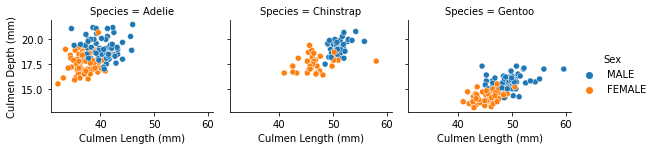

In [6]:
fgrid = sns.relplot(x = "Culmen Length (mm)", 
                    y = "Culmen Depth (mm)", 
                    hue = "Sex", 
                    data = penguins,
                    col="Species", col_wrap=3,
                    units="Species",
                    height = 2,
                    aspect = 1.3,
                    estimator=None)

*The spread of these species' culmen length and culmen depth are visibly different and data between male and female varies. These two features will provide the highly accurate prediction of species along with qualitative feature sex.*

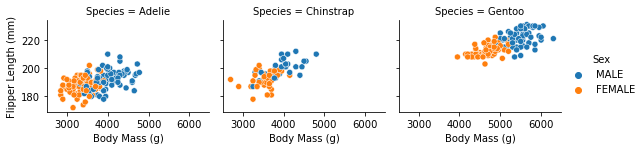

In [7]:
fgrid = sns.relplot(x = "Body Mass (g)", 
                    y = "Flipper Length (mm)", 
                    col="Species", col_wrap=3,
                    hue = "Sex", 
                    height = 2,
                   aspect = 1.3,
                   estimator=None,
                    data = penguins)

*Adelie and Chisntrap's points are relatively nearby on each scatter plot while Gentoo's data points are far from the other two. Using body mass and flipper length as quantitative features may cause difficulty in distinguishing Adelie from Chinstrap.*

<AxesSubplot:xlabel='Delta 13 C (o/oo)', ylabel='Species'>

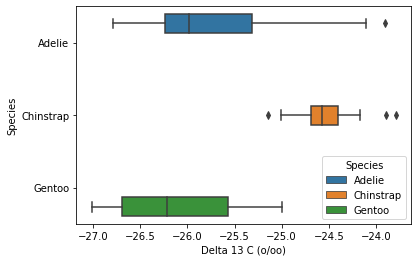

In [8]:
sns.boxplot(x="Delta 13 C (o/oo)", y="Species",
            hue="Species",
            data=penguins)

<AxesSubplot:xlabel='Delta 15 N (o/oo)', ylabel='Species'>

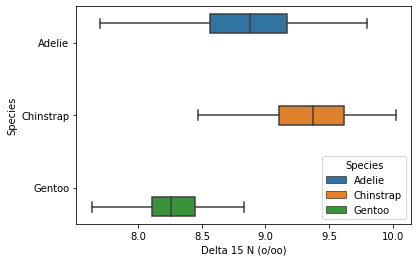

In [9]:
sns.boxplot(x="Delta 15 N (o/oo)", y="Species",
            hue="Species",
            data=penguins)

*The mean of Delta 13 C for Adelie and Gentoo penguins are relatively similar, causing difficulty in distinguishing the two species using Delta 13 C as quantitative feature. For Delta 15 N, the difference between three species are more visible. But, Adelie penguins' min and max boundaries almost include the other two species' range.*

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Island'>

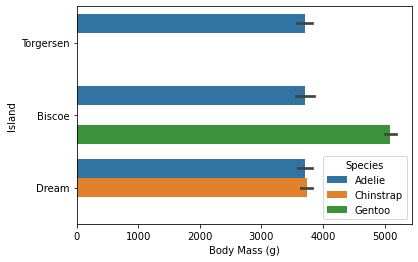

In [10]:
sns.barplot(x="Body Mass (g)", y="Island", data=penguins,
            hue="Species")

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Island'>

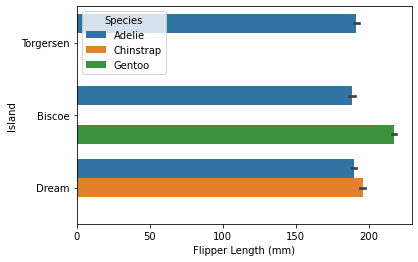

In [11]:
sns.barplot(x="Flipper Length (mm)", y="Island", data=penguins,
            hue="Species")

*Besides Gentoo penguins on Biscoe island, the other penguins have similar mean for their body mass and flipper length. These two features will not be a good combo of quantitative features in determining penguins' species.*

## Feature Selection

In [12]:
def prep_penguins(data_df):    
    df = data_df.copy()
    le = preprocessing.LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    df['Sex'] = le.fit_transform(df['Sex'])
    df = df[['Species','Region','Island','Culmen Length (mm)','Culmen Depth (mm)',
             'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
    X = df.drop(['Species'], axis = 1)
    y = df['Species'] 
    return(X, y)

#FEMALE = 0, MALE = 1
#Adelie = 0, Chinstrap = 1, Gentoo = 2

X, y= prep_penguins(penguins)

X.head(3)

,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Anvers,Torgersen,39.1,18.7,181.0,3750.0,1,NaN,NaN
1,Anvers,Torgersen,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454
2,Anvers,Torgersen,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302


In [13]:
def check_column_score(cols, model):
    print("Training with columns " + str(cols))
    return cross_val_score(model, X[cols], y, cv = 5).mean()

combos = [['Sex','Culmen Length (mm)','Culmen Depth (mm)'],
          ['Sex','Culmen Length (mm)','Flipper Length (mm)'],
          ['Sex','Culmen Length (mm)','Body Mass (g)'],
          ['Sex','Culmen Depth (mm)','Flipper Length (mm)'],
          ['Sex','Culmen Depth (mm)','Body Mass (g)'],
          ['Sex','Flipper Length (mm)', 'Body Mass (g)']]

def check_CV_score(combos, model):
    for cols in combos: 
        x = check_column_score(cols, model)
        print("CV score is " + str(np.round(x, 3)))

rf = RandomForestClassifier()
check_CV_score(combos, rf)

Training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.991
Training with columns ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.985
Training with columns ['Sex', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.97
Training with columns ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.775
Training with columns ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is 0.736
Training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.787


In [14]:
knn=KNeighborsClassifier()
check_CV_score(combos, knn)

Training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.976
Training with columns ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.955
Training with columns ['Sex', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.802
Training with columns ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.763
Training with columns ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is 0.709
Training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.745


In [15]:
clf = RidgeClassifier()
check_CV_score(combos, clf)

Training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.973
Training with columns ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.967
Training with columns ['Sex', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.976
Training with columns ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.802
Training with columns ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is 0.793
Training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.814


*For all three of our models, the combination of sex, culmen length (mm), culmen depth (mm) gives the highest CV score. Thus we choose this combination of features.*

### Process Data

In [16]:
def prep_penguins(data_df):    
    df = data_df.copy()
    le = preprocessing.LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    df['Sex'] = le.fit_transform(df['Sex'])
    df = df[['Species','Sex','Culmen Length (mm)','Culmen Depth (mm)']]
    X = df.drop(['Species'], axis = 1)
    y = df['Species'] 
    return(X, y)

#FEMALE = 0, MALE = 1
#Adelie = 0, Chinstrap = 1, Gentoo = 2
X_train, y_train = prep_penguins(Train)
X_test, y_test = prep_penguins(Test)

X_train.head(3)

,Sex,Culmen Length (mm),Culmen Depth (mm)
154,1,51.3,19.2
99,1,43.2,18.5
254,0,49.1,14.8


Since we decided to use "Culmen Length (mm)", "Culmen Depth (mm)" and "Sex" as the three fearures, we process the data so that only "Culmen Length (mm)", "Culmen Depth (mm)"and "Sex" remain in the dataset.

## Modeling

#### Random Forest Classifier

[Text(0.5, 0, 'N_estimators'),
 Text(0, 0.5, 'Performance (score)'),
 Text(0.5, 1.0, 'Best n_estimators: 4 with best test score of 0.9887464387464387')]

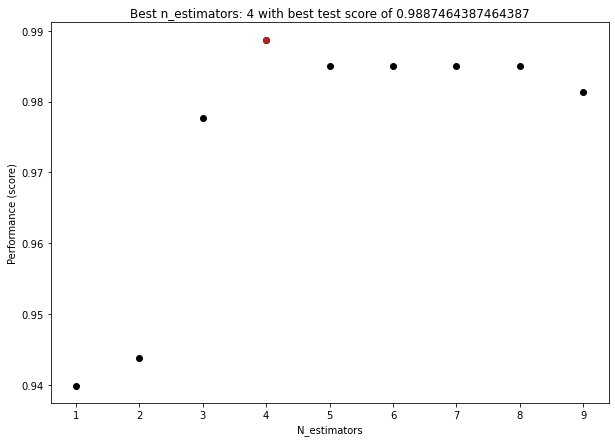

In [17]:
fig, ax = plt.subplots(1, figsize = (10, 7))
best_score = 0
best_d = 1

#Choose complexity parameter
for d in range(1, 10):
    rf = RandomForestClassifier(n_estimators=d, random_state = 12345)
    cv_score = cross_val_score(rf, X_train, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_d = d
        best_score = cv_score
        
ax.scatter(best_d, best_score, color = "firebrick")
ax.set(xlabel = "N_estimators", ylabel = "Performance (score)", 
       title = "Best n_estimators: " + str(best_d) + " with best test score of " + str(best_score))

In [18]:
rf = RandomForestClassifier(n_estimators = best_d, random_state = 12345)
rf.fit(X_train, y_train)

cross_val_score(rf, X_train, y_train, cv = 10).mean(), cross_val_score(rf, X_test, y_test, cv = 10).mean()

(0.9887464387464387, 0.9714285714285715)

Since the cross validation scores for the training and testing set are both really high, this prediction model is very accurate.

In [19]:
def error(model):
    y_predict = model.predict(X_test)
    c = confusion_matrix(y_test, y_predict)
    print("Confusion matrix for " + str(model) + ":\n")
    print(c)
    print("\n")
    
    mistakes = X_test[y_test != y_predict]
    mistake_labels = y_test[y_test != y_predict]
    mistake_preds = y_predict[y_test != y_predict]
    print('Mistake(s): \n')
    print(mistake_preds, mistake_labels)
    print('\n')
    
    p = Test.copy()
    p = p[['Sex','Culmen Length (mm)', 'Culmen Depth (mm)']]
    p['Species'] = y_test
    p["preds"] = model.predict(X_test)
    p['preds_true']=p["Species"]==p["preds"]
    print(p)
    return p

p = error(rf)

Confusion matrix for RandomForestClassifier(n_estimators=4, random_state=12345):

[[26  0  0]
 [ 1 13  0]
 [ 0  0 25]]


Mistake(s): 

[0] 182    1
Name: Species, dtype: int64


        Sex  Culmen Length (mm)  Culmen Depth (mm)  Species  preds  preds_true
55     MALE                41.4               18.6        0      0        True
184  FEMALE                42.5               16.7        1      1        True
20   FEMALE                37.8               18.3        0      0        True
182  FEMALE                40.9               16.6        1      0       False
269    MALE                45.2               15.8        2      2        True
..      ...                 ...                ...      ...    ...         ...
87   FEMALE                36.9               18.6        0      0        True
333    MALE                51.5               16.3        2      2        True
174  FEMALE                43.2               16.6        1      1        True
101    MALE                41.0 

In [20]:
print(p[['Species', 'Sex']][p['preds_true']==False])

     Species     Sex
182        1  FEMALE


The prediction error occurs at index 182, a female Chinstrap penguin is mistakenly predicted to be an Adelie penguin. As seen in the decision region below, the boundaries of female Chinstrap penguin and female Adelie penguin touch and overlap slightly, leading to potential error such as the penguin at index 182. 

In [21]:
def plot_decision_boundaries(X, y, model, feature1, feature2, qualVarName, qualScore):
#def plot_decision_boundaries(X, y, model): #add features instead of current delta var
    #x is the first quantitative feature, y is the second
    x_min, x_max = X[feature1].min(), X[feature1].max()
    y_min, y_max = X[feature2].min(), X[feature2].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    qualitativeCol = pd.DataFrame([qualScore]*xx.size,columns=[qualVarName])
    Z = model.predict(np.c_[qualitativeCol, xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax[qualScore].contourf(xx, yy, Z, alpha=0.4)
    result = y
    ax[qualScore].scatter(X[y==0][feature1], 
                X[y==0][feature2], 
                color="yellow", alpha=0.8, label="Adelie Penguin")
    ax[qualScore].scatter(X[y==1][feature1], 
                X[y==1][feature2], 
                color="blue", alpha=0.8, label="Chinstrap penguin")
    ax[qualScore].scatter(X[y==2][feature1], 
                X[y==2][feature2], 
                color="red", alpha=0.8, label="Gentoo penguin")
    ax[qualScore].set(xlabel=feature1,ylabel=feature2)
    ax[qualScore].legend()

Purple region: Adelie Penguin
Blue region  : Chinstrap Penguin
Yellow region: Gentoo Penguin


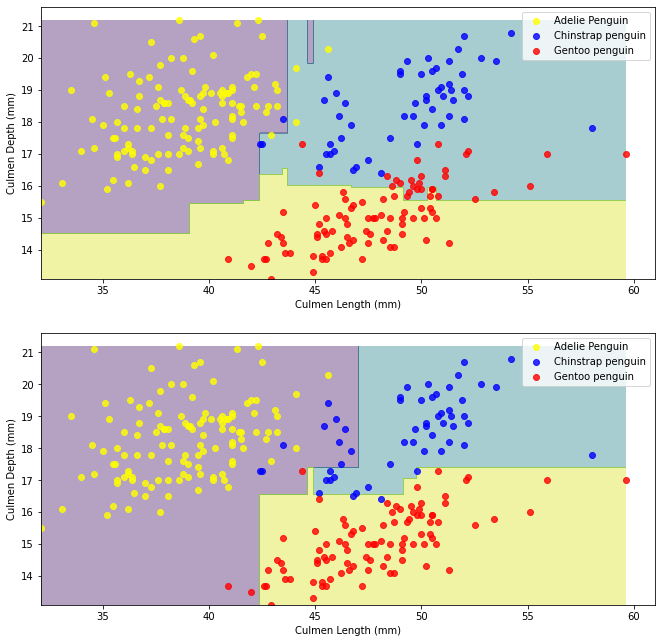

In [22]:
rf = RandomForestClassifier(n_estimators = best_d, random_state = 12345)
rf.fit(X_train, y_train)
fig, ax = plt.subplots(2,figsize=(11,11))
plot_decision_boundaries(X_train, y_train,rf,"Culmen Length (mm)", "Culmen Depth (mm)","Sex",1)
plot_decision_boundaries(X_train, y_train,rf,"Culmen Length (mm)", "Culmen Depth (mm)","Sex",0)
print("Purple region: Adelie Penguin")
print("Blue region  : Chinstrap Penguin")
print("Yellow region: Gentoo Penguin")

The first graph is the decision graph of male penguins, the secound graph is the decision graph of female penguins. We can see that if a penguin with Culmen Length about 45mm and Culmen Depth about 18mm is male, then, it is more likely to be a Adelie penguin. If it is a female, then, it is more likely to be a Chinstrap penguin. Overall, the decision boundries seem clear and accurate.*

#### KNeighborsClassifier

[Text(0.5, 0, 'n_neighbors'),
 Text(0, 0.5, 'Performance (score)'),
 Text(0.5, 1.0, 'Best n_neighbors: 1 with best test score of 0.9888888888888889')]

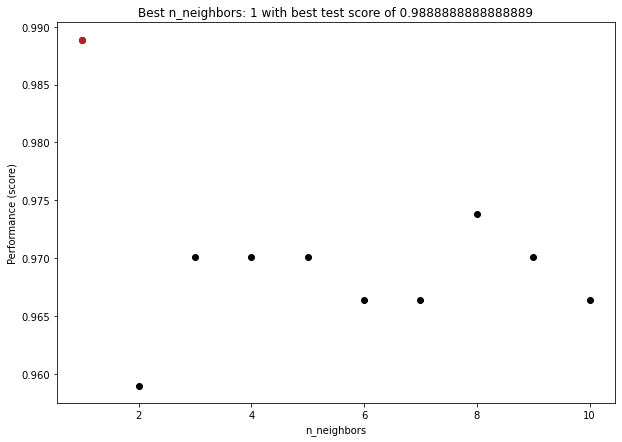

In [23]:
fig, ax = plt.subplots(1, figsize = (10, 7))
best__score = 0
best_k = 1
k_range = range(1, 11)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, X_train, y_train, cv=10).mean()
    ax.scatter(k, cv_score, color = "black")
    if cv_score > best_score:
        best_k = k
        best__score = cv_score

ax.scatter(best_k, best__score, color = "firebrick")
#Choose complexity parameter
ax.set(xlabel = "n_neighbors", ylabel = "Performance (score)", 
       title = "Best n_neighbors: " + str(best_k) + " with best test score of " + str(best__score))



From the figure above, we can see that when n_neighbors=1, we get the best performance of the combination of training and testing sets.

In [24]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)

cross_val_score(knn, X_train, y_train, cv = 5).mean(), cross_val_score(knn, X_test, y_test, cv = 5).mean()



(0.9814814814814815, 0.9692307692307693)

Since the cross validation score for the training and testing set only has a difference of about 0.012, this prediction model is very accurate.

In [25]:
p = error(knn)

Confusion matrix for KNeighborsClassifier(n_neighbors=1):

[[25  1  0]
 [ 1 13  0]
 [ 0  0 25]]


Mistake(s): 

[0 1] 182    1
73     0
Name: Species, dtype: int64


        Sex  Culmen Length (mm)  Culmen Depth (mm)  Species  preds  preds_true
55     MALE                41.4               18.6        0      0        True
184  FEMALE                42.5               16.7        1      1        True
20   FEMALE                37.8               18.3        0      0        True
182  FEMALE                40.9               16.6        1      0       False
269    MALE                45.2               15.8        2      2        True
..      ...                 ...                ...      ...    ...         ...
87   FEMALE                36.9               18.6        0      0        True
333    MALE                51.5               16.3        2      2        True
174  FEMALE                43.2               16.6        1      1        True
101    MALE                41.0             

In [26]:
print(p[['Species', 'Sex']][p['preds_true']==False])

     Species     Sex
182        1  FEMALE
73         0    MALE


The prediction error occurs at index 182 and 73. At 182, a female Chinstrap penguin is mistakenly predicted to be an Adelie penguin. As seen in our figure back in exploratory analysis, a female Chinstrap has a wide spread of data, with some dataset overlapping with the female Adelie penguin's region. At 73, a male Adelie penguin is mistakenly predicted to be a Chinstrap penguin. The borders of Adelie penguin and Chinstrap penguin touch and overlap slightly, leading to such prediction error.

Purple region: Adelie Penguin
Blue region  : Chinstrap Penguin
Yellow region: Gentoo Penguin


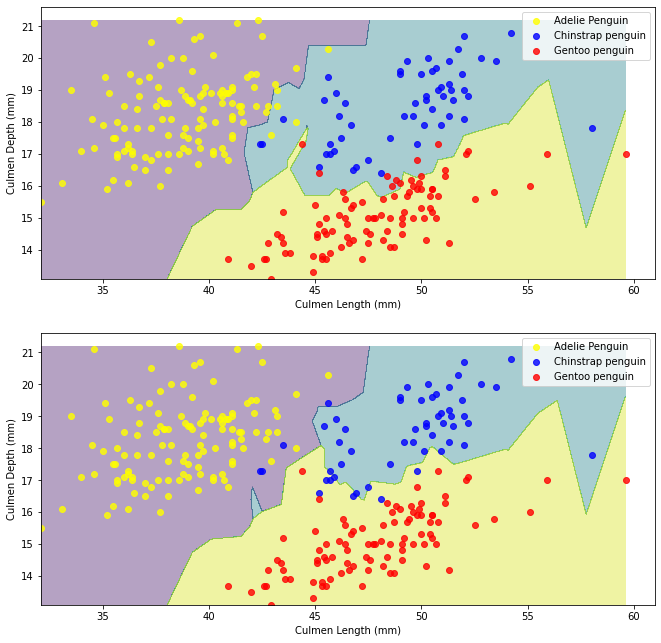

In [27]:
knn.fit(X_train,y_train)
fig, ax = plt.subplots(2,figsize=(11,11))
plot_decision_boundaries(X_train, y_train,knn,"Culmen Length (mm)", "Culmen Depth (mm)","Sex",1)
plot_decision_boundaries(X_train, y_train,knn,"Culmen Length (mm)", "Culmen Depth (mm)","Sex",0)
print("Purple region: Adelie Penguin")
print("Blue region  : Chinstrap Penguin")
print("Yellow region: Gentoo Penguin")

The first graph is the decision graph of male penguins, the secound graph is the decision graph of female penguins. We can see that if a penguin with Culmen Length about 45mm and Culmen Depth about 19mm is male, then, it is more likely to be a Adelie penguin. If it is a female, then, it is more likely to be a Chinstrap penguin. Overall, the decision boundries seem clear and accurate.

#### RidgeClassifier

[Text(0.5, 0, 'Alpha'),
 Text(0, 0.5, 'Performance (score)'),
 Text(0.5, 1.0, 'Best alpha: 1 with best test score of 0.981196581196581')]

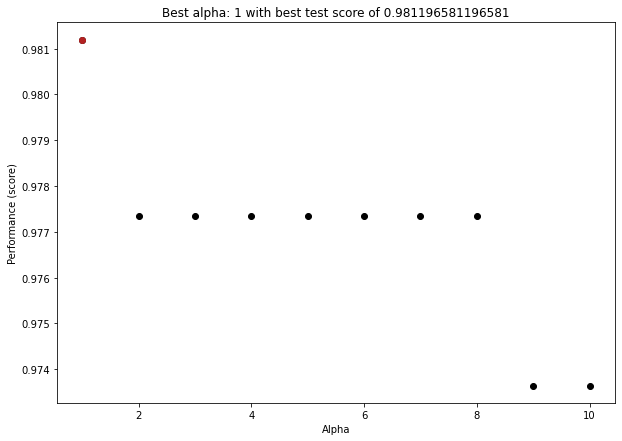

In [28]:
fig, ax = plt.subplots(1, figsize = (10, 7))
best_score = 0
best_a = 1

#Choose complexity parameter
for a in range(1, 11):
    clf = RidgeClassifier(alpha = a)
    cv_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    ax.scatter(a, cv_score, color = "black")
    if cv_score > best_score:
        best_a = a
        best_score = cv_score
        
ax.scatter(best_a, best_score, color = "firebrick")
ax.set(xlabel = "Alpha", ylabel = "Performance (score)", 
       title = "Best alpha: " + str(best_a) + " with best test score of " + str(best_score))

In [29]:
clf = RidgeClassifier(alpha = best_a)
clf.fit(X_train, y_train)

cross_val_score(clf, X_train, y_train, cv = 5).mean(), cross_val_score(clf, X_test, y_test, cv = 5).mean()

(0.9775681341719078, 0.9384615384615385)

Since the cross validation score for the training and testing set only has a diffrenece of 0.04, this prediction model is not overlapping and it is relatively accurate.

In [30]:
p=error(clf)

Confusion matrix for RidgeClassifier(alpha=1):

[[25  1  0]
 [ 3 11  0]
 [ 0  0 25]]


Mistake(s): 

[0 0 1 0] 184    1
182    1
19     0
174    1
Name: Species, dtype: int64


        Sex  Culmen Length (mm)  Culmen Depth (mm)  Species  preds  preds_true
55     MALE                41.4               18.6        0      0        True
184  FEMALE                42.5               16.7        1      0       False
20   FEMALE                37.8               18.3        0      0        True
182  FEMALE                40.9               16.6        1      0       False
269    MALE                45.2               15.8        2      2        True
..      ...                 ...                ...      ...    ...         ...
87   FEMALE                36.9               18.6        0      0        True
333    MALE                51.5               16.3        2      2        True
174  FEMALE                43.2               16.6        1      0       False
101    MALE                41.0  

In [31]:
print(p[['Species', 'Sex']][p['preds_true']==False])

     Species     Sex
184        1  FEMALE
182        1  FEMALE
19         0    MALE
174        1  FEMALE


The prediction error occurs at index 182, 19, 184, and 174. At 182, 184 and 174, a Chinstrap penguin is mistakenly predicted to be an Adelie penguin. As seen in our figure back in exploratory analysis, a female Chinstrap has a wide spread of data, with few overlapping with the female Adelie penguin's region. At 19, a male Adelie penguin is mistakenly predicted to be a Chinstrap penguin. As seen in the decision region below, we can see some Adelie and Chinstrap penguins' data overlapped in certain regions, leading to such mistake in prediction.

Purple region: Adelie Penguin
Blue region  : Chinstrap Penguin
Yellow region: Gentoo Penguin


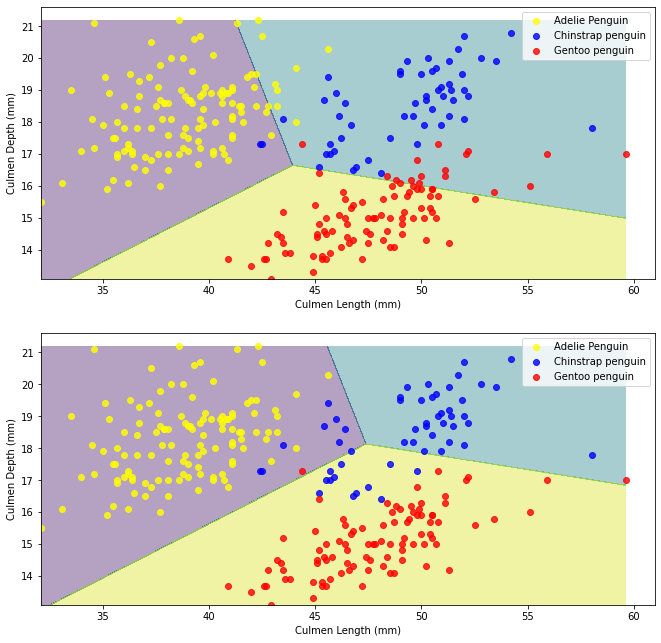

In [32]:
clf.fit(X_train,y_train)
fig, ax = plt.subplots(2,figsize=(11,11))
plot_decision_boundaries(X_train, y_train,clf,"Culmen Length (mm)", "Culmen Depth (mm)","Sex",1)
plot_decision_boundaries(X_train, y_train,clf,"Culmen Length (mm)", "Culmen Depth (mm)","Sex",0)
print("Purple region: Adelie Penguin")
print("Blue region  : Chinstrap Penguin")
print("Yellow region: Gentoo Penguin")

The first graph is the decision graph of male penguins, the secound graph is the decision graph of female penguins. We can see that if a penguin with Culmen Length about 45mm and Culmen Depth about 19mm is male, then, it is more likely to be a Adelie penguin. If it is a female, then, it is more likely to be a Chinstrap penguin. Female Chinstrap has a wide spread of data, male Chinstrap has a narrow spread of data. Overall, the decision boundries seem clear and relativly accurate. This model can be improved in a better performance.

#### Conclusion 

The overall performance of our models is good but not perfect. The combination of Random Forest model with n_estimators=4 and features of  ("Culmen Length (mm)", "Culmen Depth (mm)", "Sex") shows the best performance. This combination has the best cross_val_score for both training dataset and  testing dataset. Only one predition is wrong in this model in comparison to 2 errors in the Kth Neighbor model and 4 errors in the RidgeClassifier model. Since random forest model achieves the best CV scores of both train and test datasets in all three models, and the least number of wrong prediction in all three models, we recommend this combination of model and features. This model can be improved by improve preprocessing or making adjustments to feature selection. More data will allow the model to have better decision trees and more clarity along regions that overlapped.